In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [3]:
import os 
os.listdir('./data/Face_Mask_Dataset')

['Validation', 'Test', 'Train']

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_dir = './data/Face_Mask_Dataset/Train'
val_dir = './data/Face_Mask_Dataset/Validation'
test_dir = './data/Face_Mask_Dataset/Test'

In [ ]:
fig, ax = plt.subplots()

In [5]:
height = 160
weight = 160
batch_size = 64

In [8]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.4,
    shear_range = 0.2
)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_data = train_gen.flow_from_directory(
    train_dir,
    class_mode= 'categorical',
    color_mode='rgb',
    target_size =(height,weight) ,
    shuffle = True,
    batch_size = batch_size
)
val_data = val_gen.flow_from_directory(
    val_dir,
    class_mode= 'categorical',
    color_mode='rgb',
    target_size =(height,weight) ,
    shuffle = False,
    batch_size = batch_size
)
test_data = test_gen.flow_from_directory(
    test_dir,
    class_mode= 'categorical',
    color_mode='rgb',
    target_size =(height,weight) ,
    shuffle = False,
    batch_size = batch_size
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [12]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding = 'same',kernel_initializer='he_normal',input_shape=(160,160, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding = 'same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding = 'same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 160, 160, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 160, 160, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 64)        2

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(
    train_data,
    steps_per_epoch = train_data.n//batch_size,
    epochs = 20,verbose = 1,
    validation_data = val_data,
    validation_steps = val_data.n//batch_size
)

Epoch 1/20
156/156 [==============================] - 3213s 20s/step - loss: 3.1697 - accuracy: 0.8325 - val_loss: 2.5095 - val_accuracy: 0.5065
Epoch 2/20
156/156 [==============================] - 78s 500ms/step - loss: 0.7174 - accuracy: 0.9350 - val_loss: 0.8625 - val_accuracy: 0.7526
Epoch 3/20
156/156 [==============================] - 78s 503ms/step - loss: 0.3745 - accuracy: 0.9388 - val_loss: 0.3224 - val_accuracy: 0.9115
Epoch 4/20
156/156 [==============================] - 78s 498ms/step - loss: 0.2451 - accuracy: 0.9479 - val_loss: 0.3318 - val_accuracy: 0.9010
Epoch 5/20
156/156 [==============================] - 78s 502ms/step - loss: 0.2183 - accuracy: 0.9477 - val_loss: 0.1979 - val_accuracy: 0.9583
Epoch 6/20
156/156 [==============================] - 78s 499ms/step - loss: 0.1818 - accuracy: 0.9499 - val_loss: 0.5826 - val_accuracy: 0.8398
Epoch 7/20
156/156 [==============================] - 79s 505ms/step - loss: 0.1896 - accuracy: 0.9502 - val_loss: 0.1131 - val_ac

In [15]:
model.evaluate(test_data)

16/16 [==============================] - 287s 19s/step - loss: 0.0647 - accuracy: 0.9899


[0.06469807773828506, 0.9899193644523621]

In [16]:
model.save('mask.h5')

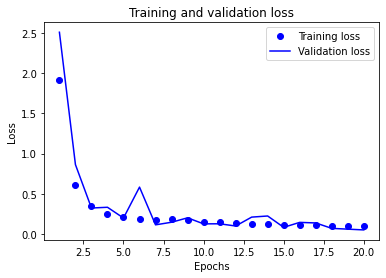

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

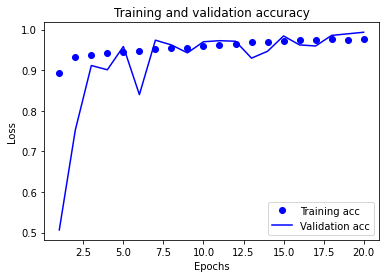

In [18]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:

with tf.device('/gpu:0'):
    # Khởi tạo base model Resnet với pretrained weights từ ImageNet
    base_model = tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                               include_top=False, 
                                               weights='imagenet')
    
    # Tạo model hoàn chỉnh bằng cách thêm lớp classifier
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    # Freeze các lớp CNN ban đầu
    base_model.trainable = False
    
    # Tạo callback để lưu model có accuracy trên tập validation tốt nhất
    mcp = tf.keras.callbacks.ModelCheckpoint("Mask_MobileNetV2.h5", monitor="val_accuracy",
                      save_best_only=True, save_weights_only=True)
    
    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
 
    history = model.fit(train_data,steps_per_epoch = train_data.n//batch_size,
                        epochs = 10,verbose = 1,
                        validation_data = val_data,
                        validation_steps = val_data.n//batch_size)
    

    base_model.trainable = True

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data,steps_per_epoch = train_data.n//batch_size,
                        epochs = 20,verbose = 1,
                        validation_data = val_data,
                        validation_steps = val_data.n//batch_size,
                        callbacks=[mcp])
   

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/10
156/156 [==============================] - 79s 489ms/step - loss: 0.1694 - accuracy: 0.9501 - val_loss: 0.0521 - val_accuracy: 0.9844
Epoch 2/10
156/156 [==============================] - 76s 486ms/step - loss: 0.0780 - accuracy: 0.9747 - val_loss: 0.0370 - val_accuracy: 0.9870
Epoch 3/10
156/156 [==============================] - 75s 481ms/step - loss: 0.0714 - accuracy: 0.9782 - val_loss: 0.0452 - val_accuracy: 0.9909
Epoch 4/10
156/156 [==============================] - 76s 486ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.0724 - val_accuracy: 0.9792
Epoch 5/10
156/156 [==============================] - 75s 480ms/step - loss: 0.0811 - accuracy: 0.9768 - val_loss: 0.0847 - val_accuracy: 0.9779
Epoch 6/10
156/156 [==============================] - 76s 486ms/step - loss: 0.0932 - accuracy: 0.9754 - val_loss: 0.0619 - val_accuracy: 0.9844
Epoch 7/10
156/156 [==============================] - 75s 483ms/ste

In [20]:
model.evaluate(test_data)

16/16 [==============================] - 3s 178ms/step - loss: 0.0040 - accuracy: 0.9990


[0.003979865927249193, 0.9989919066429138]

In [ ]:
model.save('mask_mobilenetv2.h5')

In [22]:
model.save_weights('mask_mobilenetv2')

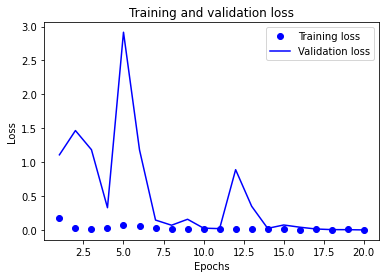

In [23]:
loss = history .history['loss']
val_loss = history .history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

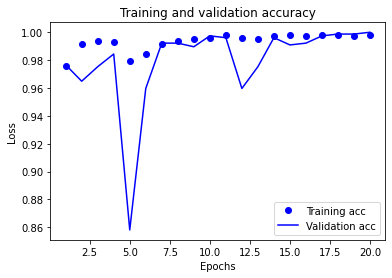

In [24]:
plt.clf()
acc = history .history['accuracy']
val_acc = history .history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
with tf.device('/gpu:0'):
    # Khởi tạo base model Resnet với pretrained weights từ ImageNet
    base_model = tf.keras.applications.DenseNet121(input_shape=(160,160,3),
                                               include_top=False, 
                                               weights='imagenet')
    
    # Tạo model hoàn chỉnh bằng cách thêm lớp classifier
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    # Freeze các lớp CNN ban đầu
    base_model.trainable = False
    
    # Tạo callback để lưu model có accuracy trên tập validation tốt nhất
    mcp = tf.keras.callbacks.ModelCheckpoint("Mask_DenseNet121.h5", monitor="val_accuracy",
                      save_best_only=True, save_weights_only=True)
    
   
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data,steps_per_epoch = train_data.n//batch_size,
                        epochs = 10,verbose = 1,
                        validation_data = val_data,
                        validation_steps = val_data.n//batch_size)
 
    base_model.trainable = True
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'])
  
    history = model.fit(train_data,steps_per_epoch = train_data.n//batch_size,
                        epochs = 20,verbose = 1,
                        validation_data = val_data,
                        validation_steps = val_data.n//batch_size,
                        callbacks=[mcp])

29089792/29084464 [==============================] - 0s 0us/step
Epoch 1/10
156/156 [==============================] - 87s 515ms/step - loss: 0.1305 - accuracy: 0.9615 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2/10
156/156 [==============================] - 80s 509ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/10
156/156 [==============================] - 79s 507ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0032 - val_accuracy: 0.9987
Epoch 4/10
156/156 [==============================] - 79s 504ms/step - loss: 0.0233 - accuracy: 0.9909 - val_loss: 0.0117 - val_accuracy: 0.9961
Epoch 5/10
156/156 [==============================] - 79s 507ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0092 - val_accuracy: 0.9974
Epoch 6/10
156/156 [==============================] - 79s 508ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 5.9750e-04 - val_accuracy: 1.0000
Epoch 7/10
156/156 [==============================] - 78s 501

In [29]:
model.save_weights('DenseNet121')

In [26]:
model.evaluate(test_data)

16/16 [==============================] - 4s 265ms/step - loss: 0.0027 - accuracy: 0.9990


[0.002722869161516428, 0.9989919066429138]

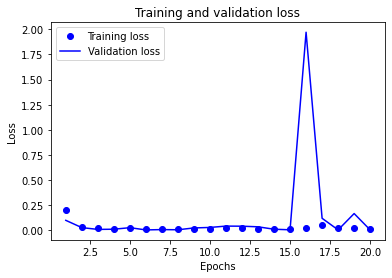

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

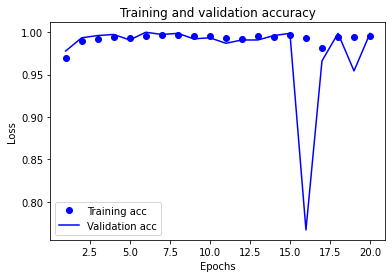

In [28]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()